<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


### Student Author: Abigail Hedden

## Set-up

In [148]:
# install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
import seaborn as sns
import sqlite3
import textwrap

In [ ]:
# pre-set plotting style
sns.set(style="whitegrid")

### Database 3

In [237]:
# download database
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-11 10:20:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  6.45MB/s    in 18s     

2025-07-11 10:20:29 (11.2 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



In [263]:
# connect to database
conn = sqlite3.connect('survey-results-public.sqlite')

## Query data from SQLite for Boxplots

### Box Plot of CompTotal (Total Compensation)

In [264]:
# query data
comp_df = pd.read_sql_query("SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 1000000", conn3)
comp_df.shape
comp_df.describe()

,CompTotal
count,29747.000000
mean,155733.075167
std,179748.113792
min,0.000000
25%,53621.500000
50%,95000.000000
75%,171000.000000
max,999999.000000


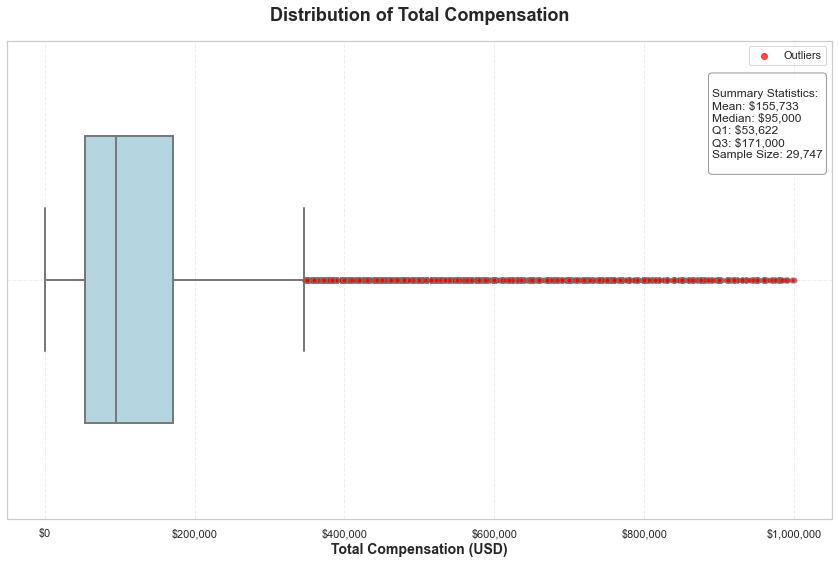

In [310]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))

box_plot = sns.boxplot(data=comp_df, x="CompTotal", ax=ax, color='lightblue', width=0.6, linewidth=2, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7))

ax.set_title('Distribution of Total Compensation', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Total Compensation (USD)', fontsize=14, fontweight='semibold')
ax.set_ylabel('', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(True, alpha=0.3, linestyle='--')

# add summary stats box
stats = comp_df['CompTotal'].describe()
stats_text = f"""
Summary Statistics:
Mean: ${stats['mean']:,.0f}
Median: ${stats['50%']:,.0f}
Q1: ${stats['25%']:,.0f}
Q3: ${stats['75%']:,.0f}
Sample Size: {len(comp_df):,}
"""

ax.text(
    0.855, 0.925, stats_text,
    transform=ax.transAxes,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.8,
        edgecolor='gray'
    ),
    fontsize=12,
    fontfamily='sans-serif'
)

# create a dummy scatter plot just to get a legend handle to indicate red dot meaning
outlier_handle = ax.scatter([], [], color='red', alpha=0.7, label='Outliers')
ax.legend()

plt.tight_layout()

plt.show()

### Box Plot of Age (converted to numeric values)

In [284]:
age_df = pd.read_sql_query("SELECT Age FROM main WHERE Age IS NOT NULL", conn3)

# map age groups to numeric values -- use midpoint of age group
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

age_df['AgeNumeric'] = age_df['Age'].map(age_map)

print(age_df.head(10))
age_stats = age_df['AgeNumeric'].describe()
print(age_stats)

                  Age  AgeNumeric
0  Under 18 years old        16.0
1     35-44 years old        39.5
2     45-54 years old        49.5
3     18-24 years old        21.0
4     18-24 years old        21.0
5  Under 18 years old        16.0
6     35-44 years old        39.5
7     18-24 years old        21.0
8     45-54 years old        49.5
9     35-44 years old        39.5
count    65115.000000
mean        33.007871
std         11.264959
min         16.000000
25%         21.000000
50%         29.500000
75%         39.500000
max         70.000000
Name: AgeNumeric, dtype: float64


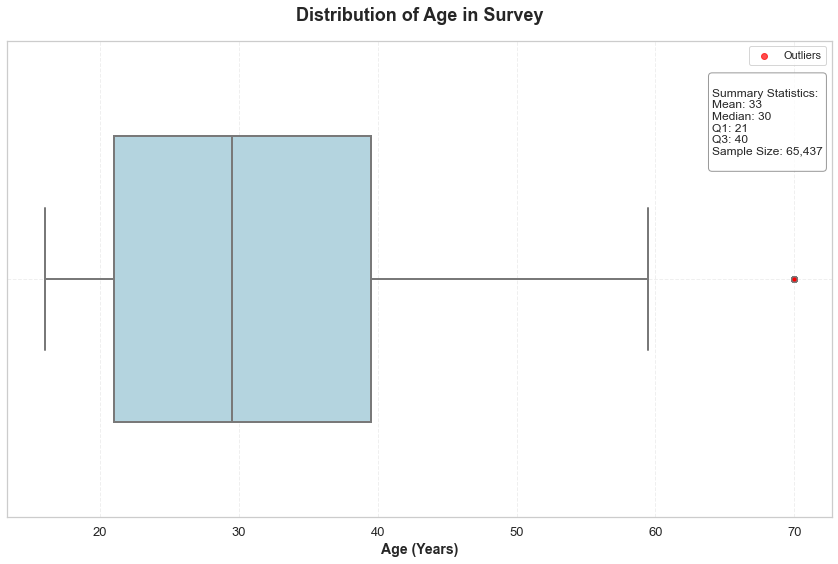

In [298]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))

box_plot = sns.boxplot(data=age_df, x="AgeNumeric", ax=ax, color='lightblue', width=0.6, linewidth=2, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7))

ax.set_title('Distribution of Age in Survey', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age (Years)', fontsize=14, fontweight='semibold')
ax.set_ylabel('', fontsize=12)
ax.tick_params(axis='both', labelsize=13)
ax.grid(True, alpha=0.3, linestyle='--')

# add summary stats box
stats_text = f"""
Summary Statistics:
Mean: {age_stats['mean']:,.0f}
Median: {age_stats['50%']:,.0f}
Q1: {age_stats['25%']:,.0f}
Q3: {age_stats['75%']:,.0f}
Sample Size: {len(age_df):,}
"""

ax.text(
    0.855, 0.925, stats_text,
    transform=ax.transAxes,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.8,
        edgecolor='gray'
    ),
    fontsize=12,
    fontfamily='sans-serif'
)

# create a dummy scatter plot just to get a legend handle to indicate red dot meaning
outlier_handle = ax.scatter([], [], color='red', alpha=0.7, label='Outliers')
ax.legend()

plt.tight_layout()

plt.show()

### Box Plot of CompTotal Grouped by Age Groups

In [359]:
age_comp_df = pd.read_sql_query("SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1000000", conn3)
age_comp_df.groupby('Age')['CompTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
18-24 years old,4073.0,127747.472379,189643.765919,0.0,25000.0,52000.0,120000.0,980000.0
25-34 years old,12610.0,154049.091990,184327.076326,0.0,50038.5,86000.0,160000.0,999999.0
35-44 years old,8357.0,165243.774560,172994.586486,0.0,67500.0,105000.0,182800.0,997200.0
45-54 years old,3210.0,169731.593458,170465.861844,0.0,72000.0,120000.0,190000.0,984000.0
55-64 years old,1216.0,168968.249178,160068.370870,0.0,80000.0,130000.0,185250.0,960000.0
65 years or older,188.0,158454.372340,152899.201883,0.0,66500.0,124000.0,182500.0,850000.0
Prefer not to say,14.0,153950.071429,83089.423480,60000.0,108063.5,135000.0,195000.0,384000.0
Under 18 years old,79.0,82614.291139,162412.224858,0.0,5000.0,11875.0,62000.0,700000.0


In [360]:
# plot prep
# define order
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']

# remove ' years old' from 'Age' values in the dataframe for plotting and change '65 years or older' to '65+'
age_comp_df['Age_clean'] = age_comp_df['Age'].str.replace(' years old', '', regex=False)
age_comp_df['Age_clean'] = age_comp_df['Age_clean'].str.replace(' years or older', '+', regex=False)

# map color palette to age groups
muted_colors = sns.color_palette("muted", n_colors=len(age_order))
palette_dict = dict(zip(age_order, muted_colors))

# compute medians per age group
medians = age_comp_df.groupby('Age_clean')['CompTotal'].median()

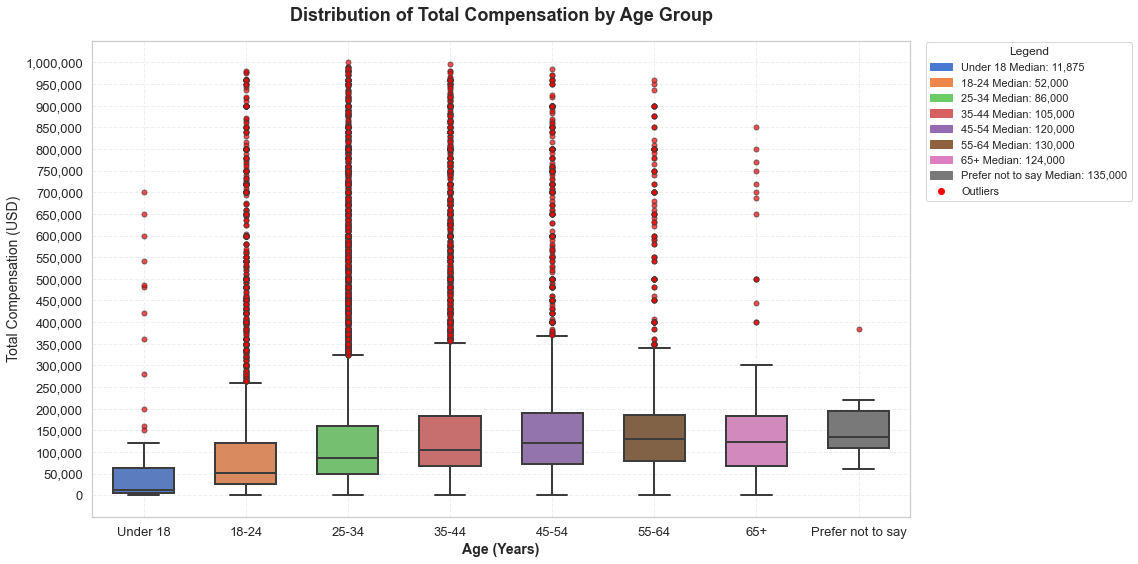

In [361]:
# plot 1 -- (most) all data
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(
    data=age_comp_df,
    x="Age_clean",
    y="CompTotal",
    order=age_order,
    ax=ax,
    palette=palette_dict,
    width=0.6,
    linewidth=2,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)
)

ax.set_title('Distribution of Total Compensation by Age Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age (Years)', fontsize=14, fontweight='semibold')
ax.set_ylabel('Total Compensation (USD)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')

# customize y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
#plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=13)

# create legend (age group medians and outliers)
legend_handles = [
    Patch(color=palette_dict[age], label=f"{age} Median: {medians.get(age, float('nan')):,.0f}")
    for age in age_order if age in medians
]
outlier_handle = plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Outliers')
ax.legend(handles=legend_handles + [outlier_handle], title="Legend", fontsize=11, title_fontsize=12, loc='center left', bbox_to_anchor=(1.02, 0.83), borderaxespad=0)

plt.tight_layout()
plt.show()


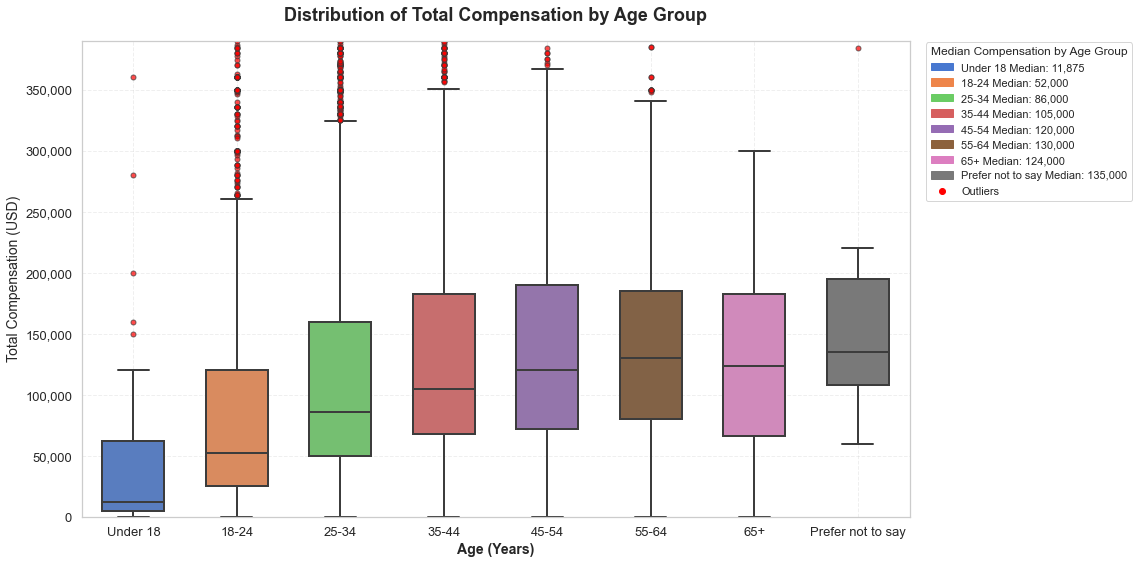

In [362]:
# plot 2 -- y axis limited to reduce number of outliers plotted
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(
    data=age_comp_df,
    x="Age_clean",
    y="CompTotal",
    order=age_order,
    ax=ax,
    palette=palette_dict,
    width=0.6,
    linewidth=2,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)
)

ax.set_title('Distribution of Total Compensation by Age Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age (Years)', fontsize=14, fontweight='semibold')
ax.set_ylabel('Total Compensation (USD)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')
plt.ylim(0,390000)

# customize y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
#plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=13)

# create legend (age group medians and outliers)
legend_handles = [
    Patch(color=palette_dict[age], label=f"{age} Median: {medians.get(age, float('nan')):,.0f}")
    for age in age_order if age in medians
]
outlier_handle = plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Outliers')
ax.legend(handles=legend_handles + [outlier_handle], title="Median Compensation by Age Group", fontsize=11, title_fontsize=12, loc='center left', bbox_to_anchor=(1.02, 0.83), borderaxespad=0)

plt.tight_layout()
plt.show()


### Box Plot of CompTotal Grouped by Job Satisfaction (JobSatPoints_6)

In [363]:
job_com_sat_df = pd.read_sql_query("SELECT JobSatPoints_6, CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1000000", conn3)
job_com_sat_df.groupby('JobSatPoints_6')['CompTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatPoints_6,,,,,,,,
0.0,4602.0,157075.478922,186299.492335,0.0,50000.0,90000.0,175000.0,983000.0
1.0,28.0,170767.857143,187562.309752,0.0,48750.0,87500.0,218750.0,675000.0
2.0,31.0,240069.903226,245782.664776,120.0,45500.0,163000.0,328500.0,875000.0
3.0,19.0,199092.105263,259209.463715,666.0,55000.0,100000.0,160000.0,960000.0
4.0,15.0,242226.733333,300729.492221,1.0,52000.0,96000.0,354000.0,840000.0
...,...,...,...,...,...,...,...,...
96.0,1.0,37056.000000,NaN,37056.0,37056.0,37056.0,37056.0,37056.0
97.0,1.0,56000.000000,NaN,56000.0,56000.0,56000.0,56000.0,56000.0
98.0,1.0,16000.000000,NaN,16000.0,16000.0,16000.0,16000.0,16000.0


In [365]:
# plot prep
# create satisfaction groups (10 bins)
job_com_sat_df["JobSatGroup"] = pd.cut(
    job_com_sat_df["JobSatPoints_6"],
    bins=10,
    labels=[f"{i*10}-{(i+1)*10}" for i in range(10)],
    include_lowest=True
)
job_com_sat_df

print(job_com_sat_df.groupby('JobSatGroup')['CompTotal'].describe())

# define median comptotal for satisfaction groups
medians = job_com_sat_df.groupby('JobSatGroup')['CompTotal'].median()
medians

              count           mean            std   min      25%       50%  \
JobSatGroup                                                                  
0-10         7718.0  158811.271443  184322.171880   0.0  52041.0   94000.0   
10-20        4522.0  157895.586687  176671.604481   0.0  60000.0  100000.0   
20-30        3031.0  157174.727813  168931.544908   0.0  62000.0  100000.0   
30-40        1141.0  159864.807187  177484.816007   0.0  57000.0  100000.0   
40-50         947.0  154377.093981  173186.774979   0.0  60000.0  100000.0   
50-60         381.0  148734.734908  185333.227391   5.0  47000.0   82000.0   
60-70         371.0  157826.574124  192688.333247  25.0  50000.0   85000.0   
70-80         541.0  150268.465804  188378.603564   4.0  46000.0   85000.0   
80-90         420.0  175626.830952  207912.586746   0.0  50000.0   91600.0   
90-100        617.0  153545.640194  191966.237191   0.0  42000.0   83224.0   

                  75%       max  
JobSatGroup                  

JobSatGroup
0-10       94000.0
10-20     100000.0
20-30     100000.0
30-40     100000.0
40-50     100000.0
50-60      82000.0
60-70      85000.0
70-80      85000.0
80-90      91600.0
90-100     83224.0
Name: CompTotal, dtype: float64

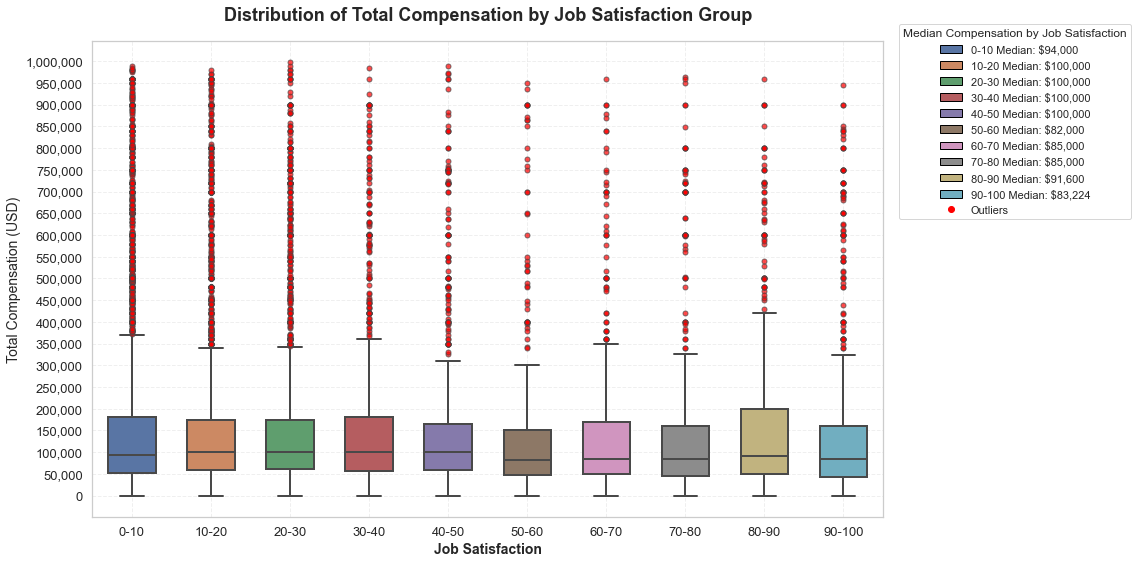

In [401]:
# plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(
    data=job_com_sat_df,
    x="JobSatGroup",
    y="CompTotal",
    ax=ax,
    width=0.6,
    linewidth=2,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)
)

ax.set_title('Distribution of Total Compensation by Job Satisfaction Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Job Satisfaction', fontsize=14, fontweight='semibold')
ax.set_ylabel('Total Compensation (USD)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')
#plt.ylim(0,390000)

ax.tick_params(axis='both', labelsize=13)


## make legend
# extract colors used in plot
boxes = [patch for patch in ax.artists]
box_colors = [box.get_facecolor() for box in boxes]

# map colors to JobSatGroup labels
job_sat_groups = job_com_sat_df["JobSatGroup"].cat.categories.tolist()

# build legend handles
legend_handles = []
for group, color in zip(job_sat_groups, box_colors):
    median_value = medians.get(group, float('nan'))
    label = f"{group} Median: ${median_value:,.0f}"
    legend_handles.append(
        Patch(facecolor=color, edgecolor='black', label=label)
    )

# outlier legend handle
outlier_handle = plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Outliers')

ax.legend(
    handles=legend_handles + [outlier_handle],
    title="Median Compensation by Job Satisfaction",
    fontsize=11,
    title_fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.83),
    borderaxespad=0
)

# customize y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
#plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=13)


plt.tight_layout()
plt.show()


### Box Plot of ConvertedCompYearly for the Top 5 Developer Types

In [369]:
# query top 5 developers
query_top5_dev = """
SELECT DevType, COUNT(*) as count
FROM main
WHERE DevType IS NOT NULL
GROUP BY DevType
ORDER BY count DESC
LIMIT 5
"""
top5_dev = pd.read_sql_query(query_top5_dev, conn3)
top5_dev_list = top5_dev["DevType"].tolist()
print(top5_dev)

                                         DevType  count
0                          Developer, full-stack  18260
1                            Developer, back-end   9928
2                                        Student   5102
3                           Developer, front-end   3349
4  Developer, desktop or enterprise applications   2493


In [373]:
# query where developer is in top 5 developers
query = f"""
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IN ({','.join(['?']*len(top5_dev_list))})
AND ConvertedCompYearly IS NOT NULL
AND ConvertedCompYearly < 1000000
"""
df_dev = pd.read_sql_query(query, conn3, params=top5_dev_list)
df_dev.describe()

,ConvertedCompYearly
count,15623.000000
mean,76274.094476
std,68614.465512
min,1.000000
25%,30074.000000
50%,62503.000000
75%,102000.000000
max,945000.000000


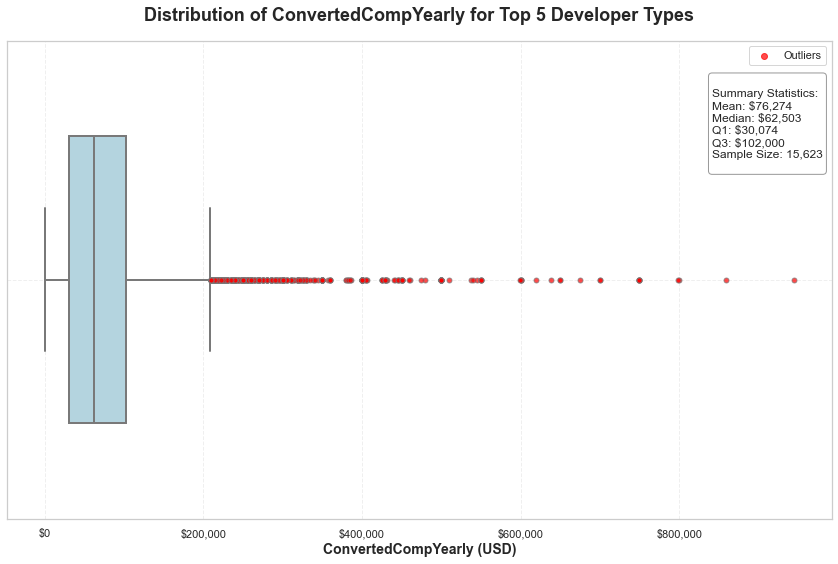

In [374]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))

box_plot = sns.boxplot(data=df_dev, x="ConvertedCompYearly", ax=ax, color='lightblue', width=0.6, linewidth=2, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7))

ax.set_title('Distribution of ConvertedCompYearly for Top 5 Developer Types', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('ConvertedCompYearly (USD)', fontsize=14, fontweight='semibold')
ax.set_ylabel('', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(True, alpha=0.3, linestyle='--')

# add summary stats box
stats = df_dev['ConvertedCompYearly'].describe()
stats_text = f"""
Summary Statistics:
Mean: ${stats['mean']:,.0f}
Median: ${stats['50%']:,.0f}
Q1: ${stats['25%']:,.0f}
Q3: ${stats['75%']:,.0f}
Sample Size: {len(df_dev):,}
"""

ax.text(
    0.855, 0.925, stats_text,
    transform=ax.transAxes,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.8,
        edgecolor='gray'
    ),
    fontsize=12,
    fontfamily='sans-serif'
)

# create a dummy scatter plot just to get a legend handle to indicate red dot meaning
outlier_handle = ax.scatter([], [], color='red', alpha=0.7, label='Outliers')
ax.legend()

plt.tight_layout()

plt.show()

### Box Plot of CompTotal for the Top 5 Countries:

In [376]:
# query top 5 developers
query_top5_country = """
SELECT Country, COUNT(*) as count
FROM main
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY count DESC
LIMIT 5
"""
top5_country = pd.read_sql_query(query_top5_country, conn3)
top5_country_list = top5_country["Country"].tolist()
print(top5_country)

                                             Country  count
0                           United States of America  11095
1                                            Germany   4947
2                                              India   4231
3  United Kingdom of Great Britain and Northern I...   3224
4                                            Ukraine   2672


In [377]:
# query where developer is in top 5 developers
query = f"""
SELECT Country, ConvertedCompYearly
FROM main
WHERE Country IN ({','.join(['?']*len(top5_country_list))})
AND ConvertedCompYearly IS NOT NULL
AND ConvertedCompYearly < 1000000
"""
df_country = pd.read_sql_query(query, conn3, params=top5_country_list)
df_country.describe()

,ConvertedCompYearly
count,10606.000000
mean,104991.945125
std,90067.166933
min,1.000000
25%,48333.000000
50%,88000.000000
75%,143750.000000
max,980887.000000


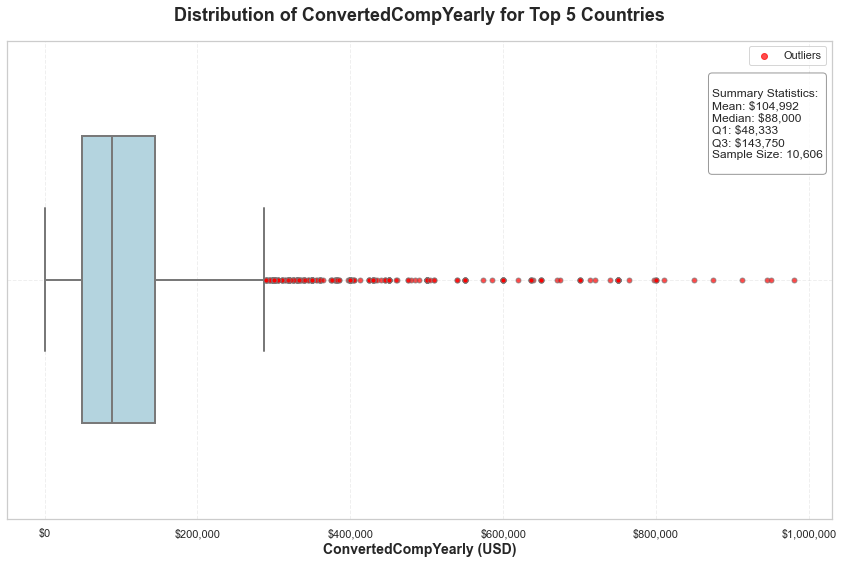

In [379]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))

box_plot = sns.boxplot(data=df_country, x="ConvertedCompYearly", ax=ax, color='lightblue', width=0.6, linewidth=2, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7))

ax.set_title('Distribution of ConvertedCompYearly for Top 5 Countries', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('ConvertedCompYearly (USD)', fontsize=14, fontweight='semibold')
ax.set_ylabel('', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(True, alpha=0.3, linestyle='--')

# add summary stats box
stats = df_country['ConvertedCompYearly'].describe()
stats_text = f"""
Summary Statistics:
Mean: ${stats['mean']:,.0f}
Median: ${stats['50%']:,.0f}
Q1: ${stats['25%']:,.0f}
Q3: ${stats['75%']:,.0f}
Sample Size: {len(df_country):,}
"""

ax.text(
    0.855, 0.925, stats_text,
    transform=ax.transAxes,
    verticalalignment='top',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.8,
        edgecolor='gray'
    ),
    fontsize=12,
    fontfamily='sans-serif'
)

# create a dummy scatter plot just to get a legend handle to indicate red dot meaning
outlier_handle = ax.scatter([], [], color='red', alpha=0.7, label='Outliers')
ax.legend()

plt.tight_layout()

plt.show()

### Box Plot of CompTotal Across Employment Types

In [380]:
query = "SELECT Employment, CompTotal FROM main WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal < 1000000"
df_emp = pd.read_sql_query(query, conn)
df_emp.describe()

,CompTotal
count,29747.000000
mean,155733.075167
std,179748.113792
min,0.000000
25%,53621.500000
50%,95000.000000
75%,171000.000000
max,999999.000000


In [383]:
df_emp.Employment.unique()
# numerous possible employment type combinations -- need to simplify

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Not employed, but looking for work',
       'Employed, full-time;Retired',
       'Independent contractor, freelanc

In [394]:
# define function to create a new column that takes only the highest level of employment in each response
def categorize_employment(value):
    if pd.isna(value):
        return np.nan
    
    val = value.lower()
    
    if "full-time" in val:
        return "Employed Full-Time"
    elif "part-time" in val:
        return "Employed Part-Time"
    elif "student" in val:
        return "Student"
    elif "independent contractor" in val or "freelancer" in val or "self-employed" in val:
        return "Independent/Freelancer"
    elif "not employed, but looking" in val:
        return "Not Employed-Seeking"
    elif "not employed, and not looking" in val:
        return "Not Employed-Not Seeking"
    elif "retired" in val:
        return "Retired"
    else:
        return "Other/Mixed"
    
df_emp["EmploymentGroup"] = df_emp["Employment"].apply(categorize_employment)
df_emp.head(10)

df_emp.groupby('EmploymentGroup')['CompTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentGroup,,,,,,,,
Employed Full-Time,26265.0,158786.692709,181552.603146,0.0,55000.0,96000.0,175000.0,999999.0
Employed Part-Time,1178.0,94436.041596,144903.302249,0.0,25850.0,50000.0,87000.0,960000.0
Independent/Freelancer,2302.0,152298.282363,169301.021861,0.0,50000.0,100000.0,176800.0,960000.0
Not Employed-Seeking,1.0,180000.000000,NaN,180000.0,180000.0,180000.0,180000.0,180000.0
Retired,1.0,43000.000000,NaN,43000.0,43000.0,43000.0,43000.0,43000.0


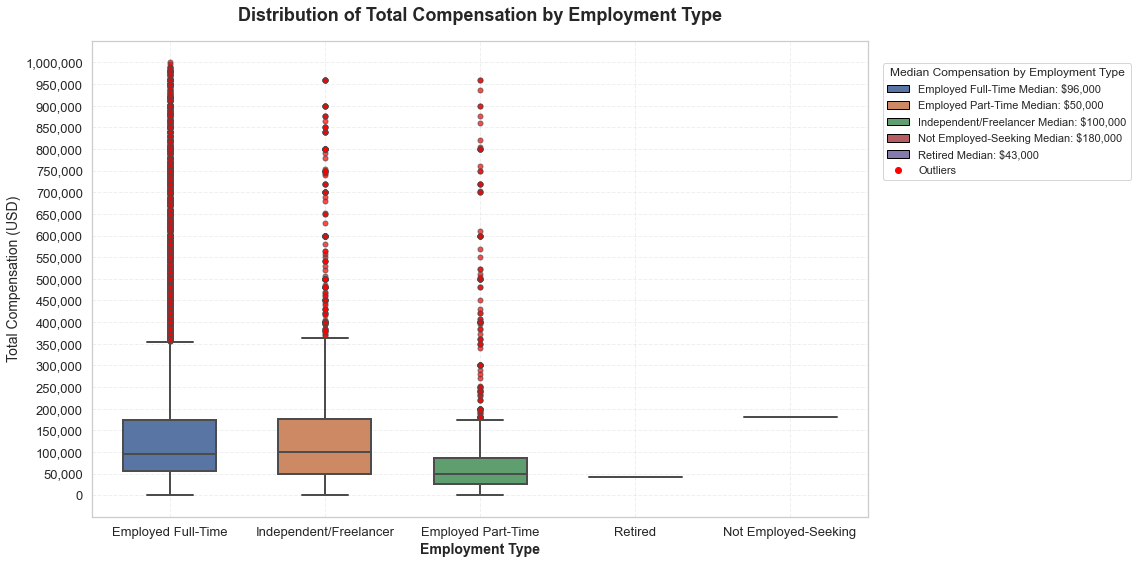

In [403]:
# plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(
    data=df_emp,
    x="EmploymentGroup",
    y="CompTotal",
    ax=ax,
    width=0.6,
    linewidth=2,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)
)

ax.set_title('Distribution of Total Compensation by Employment Type', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Employment Type', fontsize=14, fontweight='semibold')
ax.set_ylabel('Total Compensation (USD)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')
#plt.ylim(0,390000)

ax.tick_params(axis='both', labelsize=13)


## make legend
# extract colors used in plot
boxes = [patch for patch in ax.artists]
box_colors = [box.get_facecolor() for box in boxes]

# map colors to JobSatGroup labels
emp_groups = sorted(df_emp["EmploymentGroup"].unique())

# define median comptotal for satisfaction groups
medians = df_emp.groupby('EmploymentGroup')['CompTotal'].median()
medians

# build legend handles
legend_handles = []
for group, color in zip(emp_groups, box_colors):
    median_value = medians.get(group, float('nan'))
    label = f"{group} Median: ${median_value:,.0f}"
    legend_handles.append(
        Patch(facecolor=color, edgecolor='black', label=label)
    )

# outlier legend handle
outlier_handle = plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Outliers')

ax.legend(
    handles=legend_handles + [outlier_handle],
    title="Median Compensation by Employment Type",
    fontsize=11,
    title_fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.83),
    borderaxespad=0
)

# customize y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
#plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=13)


plt.tight_layout()
plt.show()


###  Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6):

In [410]:
# query needed data
years_sat_df = pd.read_sql_query("SELECT JobSatPoints_6, YearsCodePro FROM main WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL", conn3)
print(years_sat_df['YearsCodePro'].unique())

# update non-numerical data for less than 1 year and more than 50 years
years_sat_df['YearsCodePro'] = years_sat_df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}).astype(float)

# verify
print('')
print(years_sat_df['YearsCodePro'].unique())

['17' '12' '27' '10' 'Less than 1 year' '18' '15' '6' '7' '16' '14' '4'
 '8' '2' '29' '5' '30' '1' '25' '24' '26' '9' '20' '37' '11' '3' '13' '19'
 '21' '23' '34' '28' '32' '22' '33' '40' '39' '31' '35' '41' '38'
 'More than 50 years' '36' '43' '42' '50' '45' '44' '46' '48' '47' '49']

[17.  12.  27.  10.   0.5 18.  15.   6.   7.  16.  14.   4.   8.   2.
 29.   5.  30.   1.  25.  24.  26.   9.  20.  37.  11.   3.  13.  19.
 21.  23.  34.  28.  32.  22.  33.  40.  39.  31.  35.  41.  38.  51.
 36.  43.  42.  50.  45.  44.  46.  48.  47.  49. ]


In [411]:
years_sat_df

,JobSatPoints_6,YearsCodePro
0,0.0,17.0
1,30.0,12.0
2,0.0,27.0
3,60.0,10.0
4,100.0,0.5
...,...,...
28614,0.0,2.0
28615,0.0,17.0
28616,60.0,2.0
28617,0.0,7.0


In [412]:
# plot prep
# create satisfaction groups (10 bins)
years_sat_df["JobSatGroup"] = pd.cut(
    years_sat_df["JobSatPoints_6"],
    bins=10,
    labels=[f"{i*10}-{(i+1)*10}" for i in range(10)],
    include_lowest=True
)
job_com_sat_df

print(years_sat_df.groupby('JobSatGroup')['YearsCodePro'].describe())

# define median comptotal for satisfaction groups
medians = years_sat_df.groupby('JobSatGroup')['YearsCodePro'].median()
medians

               count       mean       std  min  25%  50%    75%   max
JobSatGroup                                                          
0-10         11974.0   9.882328  8.495737  0.5  3.0  7.0  14.00  51.0
10-20         6086.0  11.412340  8.628924  0.5  5.0  9.0  16.00  51.0
20-30         3906.0  11.443420  8.694244  0.5  5.0  9.0  16.00  49.0
30-40         1461.0  10.949692  8.672289  0.5  5.0  9.0  15.00  51.0
40-50         1303.0  10.665388  8.672423  0.5  4.0  8.0  15.00  48.0
50-60          570.0   9.486842  8.369766  0.5  3.0  7.0  13.00  45.0
60-70          582.0   8.430412  7.636304  0.5  3.0  6.0  10.75  45.0
70-80          890.0   7.967416  6.862301  0.5  3.0  6.0  10.00  45.0
80-90          751.0   7.970040  7.279659  0.5  3.0  6.0  10.00  44.0
90-100        1096.0   7.624544  6.674202  0.5  3.0  6.0  10.00  41.0


JobSatGroup
0-10      7.0
10-20     9.0
20-30     9.0
30-40     9.0
40-50     8.0
50-60     7.0
60-70     6.0
70-80     6.0
80-90     6.0
90-100    6.0
Name: YearsCodePro, dtype: float64

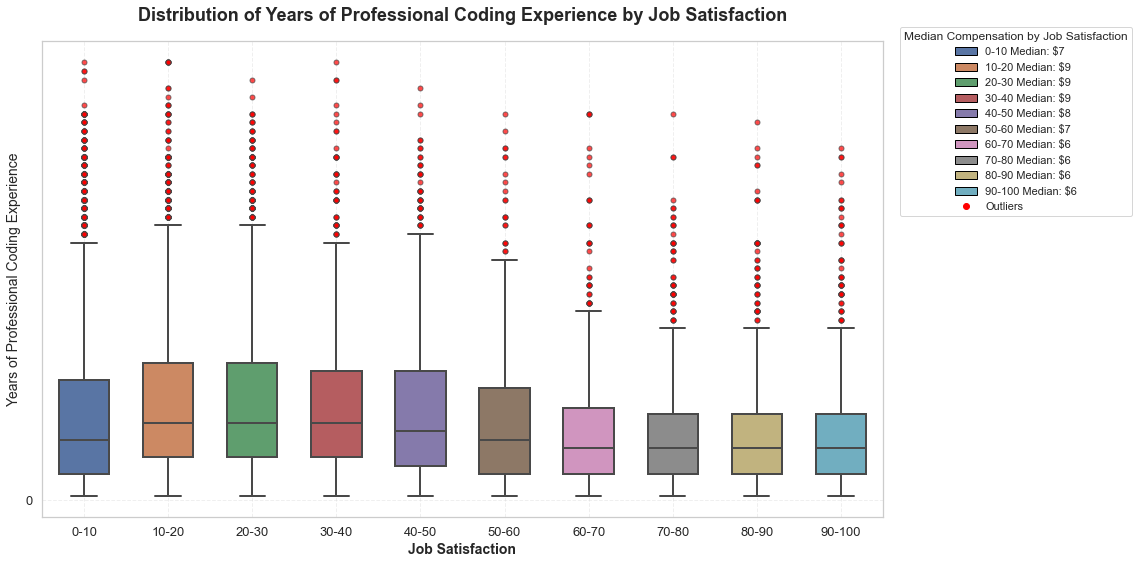

In [414]:
# plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(
    data=years_sat_df,
    x="JobSatGroup",
    y="YearsCodePro",
    ax=ax,
    width=0.6,
    linewidth=2,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)
)

ax.set_title('Distribution of Years of Professional Coding Experience by Job Satisfaction', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Job Satisfaction', fontsize=14, fontweight='semibold')
ax.set_ylabel('Years of Professional Coding Experience', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')
#plt.ylim(0,390000)

ax.tick_params(axis='both', labelsize=13)


## make legend
# extract colors used in plot
boxes = [patch for patch in ax.artists]
box_colors = [box.get_facecolor() for box in boxes]

# map colors to JobSatGroup labels
years_sat_groups = years_sat_df["JobSatGroup"].cat.categories.tolist()

# build legend handles
legend_handles = []
for group, color in zip(years_sat_groups, box_colors):
    median_value = medians.get(group, float('nan'))
    label = f"{group} Median: ${median_value:,.0f}"
    legend_handles.append(
        Patch(facecolor=color, edgecolor='black', label=label)
    )

# outlier legend handle
outlier_handle = plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Outliers')

ax.legend(
    handles=legend_handles + [outlier_handle],
    title="Median Compensation by Job Satisfaction",
    fontsize=11,
    title_fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.83),
    borderaxespad=0
)

# customize y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
#plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=13)


plt.tight_layout()
plt.show()


## Close connection

In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
